In [2]:
import numpy as np
import pandas as pd
import folium
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import nltk
import random
import folium.plugins
import seaborn as sns
import scipy
from scipy import stats
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import calplot
import calmap
import plotly.express as px
import json
from urllib.request import urlopen

# Calendar plot
Show how the vehicle theft in SF developed over the years. 

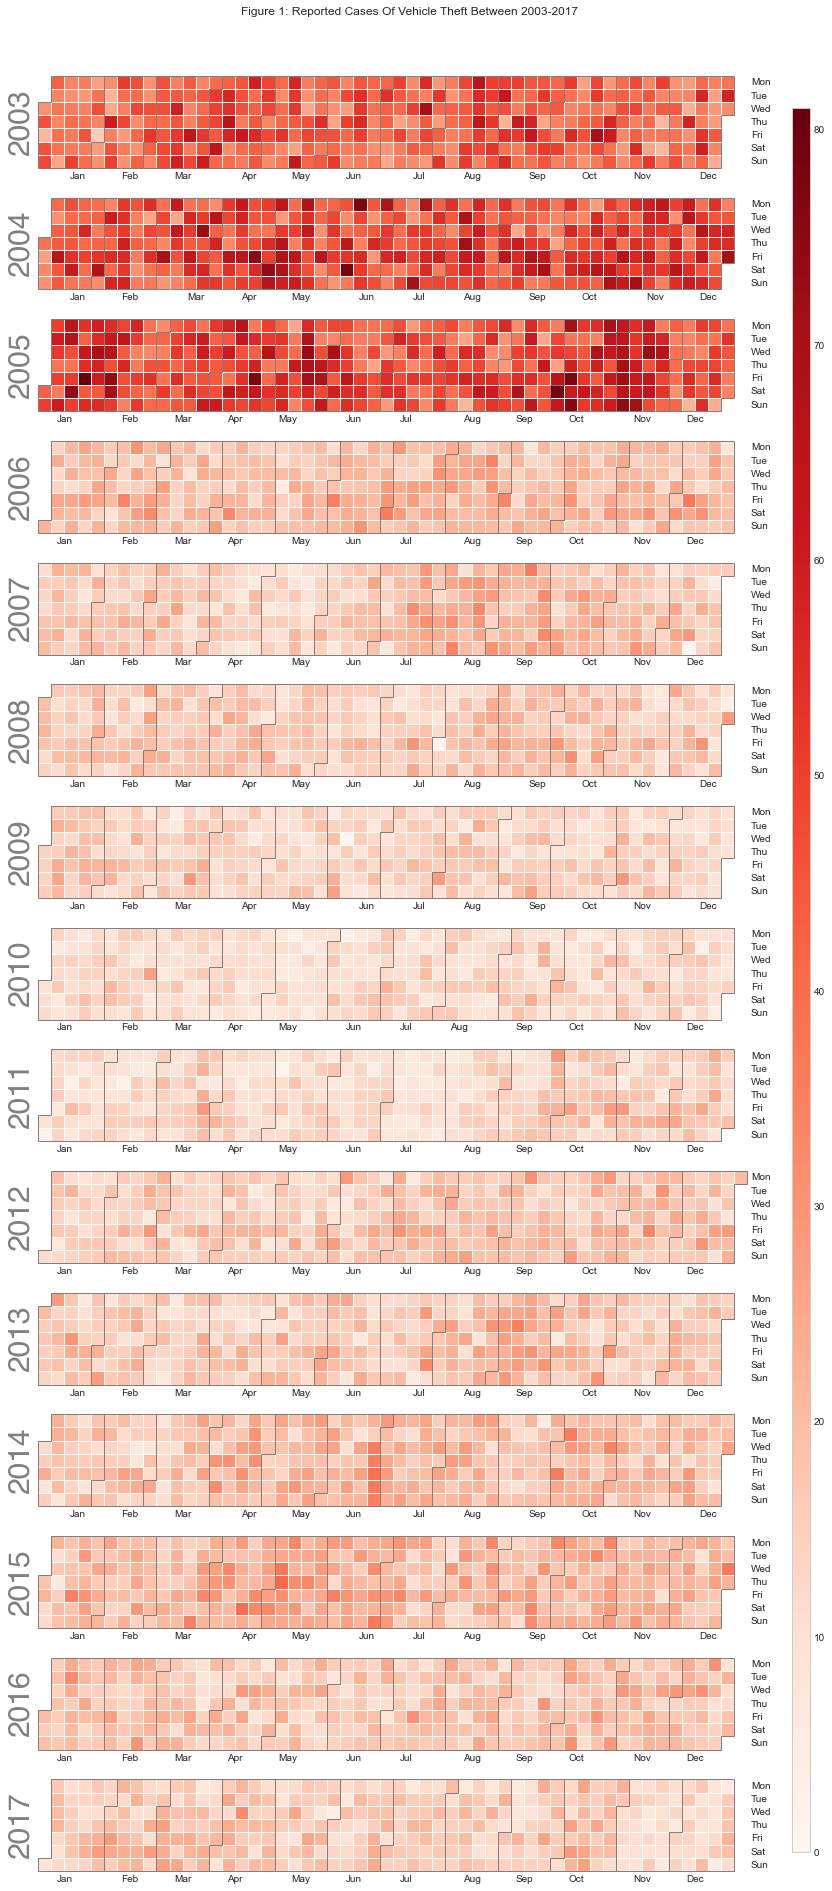

In [17]:
report_data = pd.read_csv("incidents.csv")
#We only want to consider the vehicle theft category
crime_type = "VEHICLE THEFT"
report_data["Date"] = pd.to_datetime(report_data.Date, format = "%m/%d/%Y")
report_data["Year"] = report_data["Date"].dt.year

#We want to consider all the years except 2018 when the data is not complete for the whole year.
reports_per_date = report_data.query("Year <= 2017").\
                   query(f"Category == '{crime_type}'").groupby("Date").Category.count()

calplot.calplot(reports_per_date, 
                cmap="Reds", 
                suptitle='Figure 1: Reported cases of vehicle theft between 2003-2017'.title(), 
                colorbar=True)

plt.show()

In [24]:
reports_per_date.head()

Date
2003-01-01    31
2003-01-02    46
2003-01-03    21
2003-01-04    46
2003-01-05    48
Name: Category, dtype: int64

In [31]:
reports_per_date2 = report_data.query("Year <= 2005").\
                   query(f"Category == '{crime_type}'").groupby("Date").Category.count()
years_max = reports_per_date2.max()
print("The highest amount of daily vehicle thefts in these years is: " + str(years_max))
years_min = reports_per_date2.min()
print("The lowest amount of daily vehicle thefts in these years is: " + str(years_min))

total_max = reports_per_date.max()
print("The overall highest amount of daily vehicle thefts is: " + str(total_max))
total_min = reports_per_date.min()
print("The overall lowest amount of daily vehicle thefts is: " + str(total_min))

The highest amount of daily vehicle thefts in these years is: 81
The lowest amount of daily vehicle thefts in these years is: 16
The overall highest amount of daily vehicle thefts is: 81
The overall lowest amount of daily vehicle thefts is: 1


In [47]:
total_data = reports_per_date.reset_index()
print(total_data[total_data.Category == total_data.Category.max()])
print(total_data[total_data.Category == total_data.Category.min()])

small_data = reports_per_date2.reset_index()
print(small_data[small_data.Category == small_data.Category.max()])
print(small_data[small_data.Category == small_data.Category.min()])

          Date  Category
751 2005-01-21        81
           Date  Category
3041 2011-05-03         1
          Date  Category
751 2005-01-21        81
         Date  Category
30 2003-01-31        16


Thanks to the use of the calendar plot, the data for the category “VEHICLE THEFT” is shown as a combination of a heatmap and a calendar visualization. 
It shows the amounts of crimes per each day in a calendar view. The overall view shows the years grouped and furthermore they are divided vertically in months. They are then divided in weeks which enable us to identify patterns and anomalies within the data easily. 

Immediately it can be noticed how the first three years, from 2003 until 2005, have a higher amount of vehicle thefts within the San Francisco area. This is confirmed as the website Macro Trends (https://www.macrotrends.net/cities/us/ca/san-francisco/motor-vehicle-theft-rate-statistics) where it can be seen that the years of the early 2000s suffered of the highest crime. It slowly declines over the years, and it increases again in 2015 with the highest of 801 vehicle thefts in that year. It is however lower that the first peak which happens in 2005 with 1091 vehicle thefts in the San Francisco area. 

By looking at our calendar plot, overall, the lowest amount of vehicle theft crimes is found to be 1 and it happens on the third of May of 2011; while the highest amount is 81 and it happens on the 21st of January of 2005. Respectively, for the smaller range of year that we are considering, the highest value happens on 21st of January of 2005 and the lowest amount is 16 which happens on the 31st of January 2003. 


# Map 

In [16]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)
geo_data = pd.read_csv("incidents.csv") 

geo_data_sunday=geo_data[(geo_data['Category']=='VEHICLE THEFT')&(geo_data['DayOfWeek']=='Sunday')]
group=geo_data_sunday.groupby('PdDistrict').size()
geo_data_sunday_district=pd.DataFrame({'District': group.keys(), 'Number of cases': group.values[:]})

fig_sunday = px.choropleth_mapbox(geo_data_sunday_district, geojson=counties, locations='District', color='Number of cases',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(group.values[:]) ),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat":37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Number of cases':'Number of cases'}
                          )
fig_sunday.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_sunday.show()

The immidiate impression is, that `Tenderloin` is the best place to park your car, while `Ingleside` is the most risky district. However, `Tenderloin` is a substantially smaller area than the remaining districts, so it could be relevant to also account for how big/populated the districts are. Furthermore, `Tenderloin` appears to be more centrally placed then `Ingleside`, which could mean that there aren't as many parking spots there, as in the city fringe. Thus, it might simply come down to how many cars there are available for stealing in the given districts. 


The initial impression is that the district `Tenderloin` is the best place to park your car, while `Ingleside` is the most risky district. The districts with the safest areas from the riskiest ones are in the following order:
•	`Tenderloin`
•	`Park `
•	`Richmond`
•	`Central `
•	`Southern`
•	`Taraval`
•	`Northern`
•	`Bayview`
•	`Ingleside`

However, `Tenderloin` is a substantially smaller area than the other districts considered, so it could be relevant to also account for how big/populated the districts are. Furthermore, the `Tenderloin` district appears to be more centrally placed than the `Ingleside` one, which could mean that there aren't as many parking spots there, as in the city area. Therefore, it might simply come down to how many cars are “available” for stealing in the given districts. 

The website “The Bold Italic” (https://thebolditalic.com/more-cars-being-stolen-in-these-sf-neighborhoods-the-bold-italic-san-francisco-4900f870e0e9
) is also confirming that one of the district to be aware of is `Park` district, which in 2013 had an increase of approximately 33% vehicle thefts compared to the previous year. This shows how over the years the districts might “suffer” of an increase in vehicle theft. IN the case of the `Park` district, it is possible that it had a really low amount of vehicle thefts early in the 2000s and then a sudden increase over the years. Overall the amount might still be lower compared to the other 